<a href="https://colab.research.google.com/github/Joaquin-Sanchez-Salazar/AI_DeepModel_Microfinances/blob/main/TA_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primera revisión general de los datos de morosidad con la base de dato de enero


Después de una revisión general, procedo a realizar una limpieza general para todos los meses. Además los concateno para tener un solo dataframe

In [ ]:
import pandas as pd
import os
import re

# Lista de nombres de archivos Excel (ajusta los nombres si son distintos)
nombres_archivos = [
    'C-1242-en2022.XLS', 'C-1242-fe2022.XLS', 'C-1242-ma2022.XLS',
    'C-1242-ab2022.XLS', 'C-1242-ma2022.XLS', 'C-1242-jn2022.XLS',
    'C-1242-jl2022.XLS', 'C-1242-ag2022.XLS', 'C-1242-se2022.XLS',
    'C-1242-oc2022.XLS', 'C-1242-no2022.XLS', 'C-1242-di2022.XLS'
]

# Lista para almacenar los DataFrames limpios
dataframes_limpios = []

# Función para limpieza básica
def limpiar_excel(nombre_archivo):
    mes_map = {
        'en': 1, 'fe': 2, 'ma': 3, 'ab': 4, 'my': 5, 'jn': 6,
        'jl': 7, 'ag': 8, 'se': 9, 'oc': 10, 'no': 11, 'di': 12
    }
    df = pd.read_excel(nombre_archivo, engine='xlrd', skiprows=4, usecols="B:P", skipfooter=6, index_col=0)
    df = df.dropna(how='all')
    df = df[~((df.isna()) | (df == 0)).all(axis=1)]
    df = df[df.index.str.contains("Créditos a microempresas", case=False, na=False)]
    df = df.drop(columns=["CAJAS MUNICIPALES DE AHORRO Y CREDITO", "TOTAL CAJAS MUNICIPALES"], errors='ignore')
       # Obtener número de mes
    mes_abrev = nombre_archivo.split('-')[2][:2].lower()
    mes_num = mes_map.get(mes_abrev, None)

    # Asignar número de mes como nuevo índice
    if mes_num is not None:
        df.index = [mes_num] * len(df)
    else:
        raise ValueError(f"No se pudo extraer el mes de: {nombre_archivo}")
    return df

# Cargar y limpiar cada archivo
for archivo in nombres_archivos:
    try:
        df = limpiar_excel(archivo)
        dataframes_limpios.append(df)
    except Exception as e:
        print(f"Error procesando {archivo}: {e}")

# Concatenar todos los DataFrames en uno solo
df_completo = pd.concat(dataframes_limpios)

# Mostrar una vista previa
df_completo.head(12)

,CMAC Arequipa,CMAC Cusco,CMAC Del Santa,CMAC Huancayo,CMAC Ica,CMAC Maynas,CMAC Paita,CMAC Piura,CMAC Sullana,CMAC Tacna,CMAC Trujillo,CMCP Lima
1,4.082492,3.260746,22.042995,2.847808,4.648194,7.689013,11.716300,6.824856,10.728707,5.767417,5.957363,5.828484
2,4.078758,3.215898,22.191987,3.041505,5.107605,8.170209,12.210152,6.826476,11.732075,6.077119,5.911739,6.548333
3,4.214750,3.453638,19.262764,3.216483,5.120136,7.764782,12.551649,6.533415,12.493255,5.568737,5.611453,5.581709
4,4.098239,3.464930,18.342195,3.085167,5.030013,8.686855,12.919093,6.646285,13.399922,5.899105,5.777370,5.626245
3,4.214750,3.453638,19.262764,3.216483,5.120136,7.764782,12.551649,6.533415,12.493255,5.568737,5.611453,5.581709
6,4.451144,3.598007,17.857522,3.321148,5.331062,9.084013,13.223824,6.608884,11.148171,6.047299,5.489896,6.248870
7,4.499861,3.855121,17.774417,3.258004,5.707822,9.502616,6.877118,6.470290,12.121522,6.411583,5.373647,6.619843
8,4.170813,3.641934,2.834854,3.040175,6.057372,9.911574,7.217439,5.863031,12.345858,6.829091,5.391972,7.339900
9,4.134123,3.610073,3.109677,3.290385,5.616969,8.954974,7.448122,5.984298,12.948657,6.215456,5.407590,8.996513
10,4.319179,3.546034,3.167797,3.194232,6.141049,9.461270,7.989711,6.279158,13.453617,5.948034,5.357533,10.237054


In [ ]:
# Resetear índice para convertir mes en columna
df_morosidad = df_completo.reset_index()
df_morosidad = df_morosidad.rename(columns={"index": "Mes"})
df_morosidad.head(20)

,Mes,CMAC Arequipa,CMAC Cusco,CMAC Del Santa,CMAC Huancayo,CMAC Ica,CMAC Maynas,CMAC Paita,CMAC Piura,CMAC Sullana,CMAC Tacna,CMAC Trujillo,CMCP Lima
0,1,4.082492,3.260746,22.042995,2.847808,4.648194,7.689013,11.716300,6.824856,10.728707,5.767417,5.957363,5.828484
1,2,4.078758,3.215898,22.191987,3.041505,5.107605,8.170209,12.210152,6.826476,11.732075,6.077119,5.911739,6.548333
2,3,4.214750,3.453638,19.262764,3.216483,5.120136,7.764782,12.551649,6.533415,12.493255,5.568737,5.611453,5.581709
3,4,4.098239,3.464930,18.342195,3.085167,5.030013,8.686855,12.919093,6.646285,13.399922,5.899105,5.777370,5.626245
4,3,4.214750,3.453638,19.262764,3.216483,5.120136,7.764782,12.551649,6.533415,12.493255,5.568737,5.611453,5.581709
5,6,4.451144,3.598007,17.857522,3.321148,5.331062,9.084013,13.223824,6.608884,11.148171,6.047299,5.489896,6.248870
6,7,4.499861,3.855121,17.774417,3.258004,5.707822,9.502616,6.877118,6.470290,12.121522,6.411583,5.373647,6.619843
7,8,4.170813,3.641934,2.834854,3.040175,6.057372,9.911574,7.217439,5.863031,12.345858,6.829091,5.391972,7.339900
8,9,4.134123,3.610073,3.109677,3.290385,5.616969,8.954974,7.448122,5.984298,12.948657,6.215456,5.407590,8.996513
9,10,4.319179,3.546034,3.167797,3.194232,6.141049,9.461270,7.989711,6.279158,13.453617,5.948034,5.357533,10.237054


In [ ]:
df_morosidad_largo = df_morosidad.melt(id_vars='Mes', var_name='Caja', value_name='Morosidad')
df_morosidad_largo.head(20)

,Mes,Caja,Morosidad
0,1,CMAC Arequipa,4.082492
1,2,CMAC Arequipa,4.078758
2,3,CMAC Arequipa,4.214750
3,4,CMAC Arequipa,4.098239
4,3,CMAC Arequipa,4.214750
5,6,CMAC Arequipa,4.451144
6,7,CMAC Arequipa,4.499861
7,8,CMAC Arequipa,4.170813
8,9,CMAC Arequipa,4.134123
9,10,CMAC Arequipa,4.319179


Se revisa la data de ENAHO

In [ ]:
# Si el archivo usa punto y coma como separador y codificación Latin-1:
enaho = pd.read_csv(
    "Enaho01-2022-100.csv",
    sep=",",
    encoding="latin1",
    engine="python"    # a veces ayuda con formatos extraños
)

enaho.head(15)

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,PERIODO,TIPENC,...,NBI4,NBI5,FACTOR07,NCONGLOME,SUB_CONGLOME,CODCCPP,NOMCCPP,LONGITUD,LATITUD,ALTITUD
0,2022,2,5007,3,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338
1,2022,2,5007,12,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338
2,2022,2,5007,22,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338
3,2022,2,5007,50,11,10101,4,4,1,3,...,0,0,45.282372,7070,0,1,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338
4,2022,3,5009,56,11,10101,4,4,1,3,...,0,0,167.946182,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
5,2022,3,5009,84,11,10101,4,4,1,3,...,0,0,167.946182,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
6,2022,3,5009,98,11,10101,4,4,1,3,...,0,0,167.946182,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
7,2022,3,5009,126,11,10101,4,4,1,3,...,0,0,167.946182,7076,0,1,CIUDAD CHACHAPOYAS,-77.861290,-6.225835,2287
8,2022,7,5027,6,11,10201,7,4,2,3,...,0,0,188.995743,6599,0,1,CIUDAD BAGUA,-78.527313,-5.629914,503
9,2022,7,5027,18,11,10201,7,4,2,3,...,0,0,188.995743,6599,0,1,CIUDAD BAGUA,-78.527313,-5.629914,503


In [ ]:
sumaria = pd.read_csv(
    "Sumaria-2022-12g.csv",
    sep=",",
    encoding="latin1",
    engine="python"    # a veces ayuda con formatos extraños
)

sumaria.head(15)

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,MIEPERHO,TOTMIEHO,...,ESTRSOCIAL,FACTOR07,LD,LINPE,LINEA,POBREZA,LINEAV,POBREZAV,NCONGLOME,SUB_CONGLOME
0,2022,1,5030,8,11,10201,7,4,2,2,...,4,106.890244,0.809237,223.765335,378.169434,3,636.334351,4,6618,0
1,2022,1,5030,17,11,10201,7,4,2,2,...,4,106.890244,0.809237,223.765335,378.169434,3,662.069275,4,6618,0
2,2022,1,5030,33,11,10201,7,4,4,4,...,4,106.890244,0.809237,223.765335,378.169434,3,662.475037,3,6618,0
3,2022,1,5030,50,11,10201,7,4,3,3,...,4,106.890244,0.809237,223.765335,378.169434,3,652.384521,3,6618,0
4,2022,1,5030,59,11,10201,7,4,11,11,...,4,106.890244,0.809237,223.765335,378.169434,2,654.640137,2,6618,0
5,2022,1,5049,3,11,10701,7,4,4,4,...,5,158.351349,0.809237,223.765335,378.169434,3,674.000793,3,6719,0
6,2022,1,5049,9,11,10701,7,4,5,5,...,5,158.351349,0.809237,223.765335,378.169434,3,615.735962,3,6719,0
7,2022,1,5049,19,11,10701,7,4,2,2,...,5,158.351349,0.809237,223.765335,378.169434,2,676.475403,2,6719,0
8,2022,1,5049,24,11,10701,7,4,4,4,...,5,158.351349,0.809237,223.765335,378.169434,2,650.410583,2,6719,0
9,2022,1,5049,28,11,10701,7,4,1,1,...,5,158.351349,0.809237,223.765335,378.169434,2,650.817871,2,6719,0


In [ ]:

# Paso 3: construir diccionario UBIGEO → NOMCCPP desde ENAHO
ubigeo_dict = enaho[['UBIGEO', 'NOMCCPP']].drop_duplicates().dropna()
ubigeo_dict['NOMCCPP'] = ubigeo_dict['NOMCCPP'].str.replace(r"(?i)\b(CIUDAD|PROVINCIA)\b", "", regex=True).str.strip().str.title()

# Paso 4: unir diccionario a Sumaria (solo si quieres conservar nombre de ciudad)
df = pd.merge(sumaria, ubigeo_dict, on="UBIGEO", how="left")

# Paso 5: seleccionar variables útiles
variables = [
    "MES", "UBIGEO", "MIEPERHO", "PERCEPHO", "TOTMIEHO",
    "IA01HD", "GA03HD", "INGBRUHD", "INGNETHD", "INGINDHD",
    "PAGESPHD", "INSEDTHD", "INSEDTHD1", "INSEDLHD", "POBREZA", "POBREZAV"
]
df = df[variables].copy()

# Paso 6: renombrar columnas
df = df.rename(columns={"MES": "Mes"})

# Paso 7: agregar por UBIGEO y mes
df_agregado = df.groupby(["UBIGEO", "Mes"]).agg({
    "MIEPERHO": "mean",
    "PERCEPHO": "mean",
    "TOTMIEHO": "mean",
    "IA01HD": "mean",
    "GA03HD": "mean",
    "INGBRUHD": "mean",
    "INGNETHD": "mean",
    "INGINDHD": "mean",
    "PAGESPHD": "mean",
    "INSEDTHD": "mean",
    "INSEDTHD1": "mean",
    "INSEDLHD": "mean",
    "POBREZA": "mean",
    "POBREZAV": "mean"
}).reset_index()
df_agregado["Departamento"] = df_agregado["UBIGEO"].astype(str).str[:2]

# Mostrar resultados
df_agregado.head()


,UBIGEO,Mes,MIEPERHO,PERCEPHO,TOTMIEHO,IA01HD,GA03HD,INGBRUHD,INGNETHD,INGINDHD,PAGESPHD,INSEDTHD,INSEDTHD1,INSEDLHD,POBREZA,POBREZAV,Departamento
0,10101,1,3.333333,2.333333,3.333333,5290.583333,1005.416667,24003.083333,19091.750000,3888.666667,1275.333333,0.000000,0.0,0.000000,2.833333,3.666667,10
1,10101,2,2.500000,2.100000,2.600000,6482.900000,881.400000,21139.800000,15096.000000,6296.000000,1402.700000,908.100000,0.0,908.100000,3.000000,3.800000,10
2,10101,3,3.421053,2.736842,3.473684,4636.894737,376.263158,11424.473684,8685.736842,5634.757530,279.105263,78.947368,0.0,78.947368,2.894737,3.526316,10
3,10101,4,2.769231,1.846154,2.769231,4518.692308,864.461538,14171.076923,12440.461538,7709.298077,1072.000000,3021.538462,0.0,3021.538462,3.000000,3.769231,10
4,10101,5,3.666667,2.250000,3.666667,2560.416667,99.083333,14644.583333,14363.250000,3757.916667,1058.333333,0.000000,0.0,0.000000,2.833333,3.250000,10


In [ ]:
# --- Paso 3: Diccionario de cajas por código de departamento ---
departamentos_por_caja = {
    "CMAC Arequipa": ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25"],
    "CMAC Huancayo": ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18"],
    "CMAC Tacna": ["03","04","05","07","10","14","18","21"],
    "CMAC Ica": ["11"],
    "CMCP Lima": ["15"],
    "CMAC Piura": ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25"],
    "CMAC Sullana": ["01","02","03"],
    "CMAC Trujillo": ["13"]
}

# --- Paso 4: Merge por Departamento y Mes ---
filas = []

for _, fila in df_morosidad_largo.iterrows():
    caja = fila["Caja"]
    mes = fila["Mes"]
    morosidad = fila["Morosidad"]
    if caja in departamentos_por_caja:
        codigos = departamentos_por_caja[caja]
        df_filtrado = df_agregado[(df_agregado["Mes"] == mes) & (df_agregado["Departamento"].isin(codigos))]
        if not df_filtrado.empty:
            resumen = df_filtrado.drop(columns=["UBIGEO", "Mes", "Departamento"]).mean().to_dict()
            resumen.update({
                "Caja": caja,
                "Mes": mes,
                "Morosidad": morosidad
            })
            filas.append(resumen)

# --- Paso 5: DataFrame final para modelado ---
df_modelo_final = pd.DataFrame(filas)

# Mostrar las primeras filas
df_modelo_final.head()


,MIEPERHO,PERCEPHO,TOTMIEHO,IA01HD,GA03HD,INGBRUHD,INGNETHD,INGINDHD,PAGESPHD,INSEDTHD,INSEDTHD1,INSEDLHD,POBREZA,POBREZAV,Caja,Mes,Morosidad
0,3.376963,2.168241,3.398572,3632.727304,339.053510,12233.520752,10786.264164,7977.786323,1061.204870,393.326542,0.0,390.196424,2.726395,3.180547,CMAC Arequipa,1,4.082492
1,3.242659,2.119560,3.265349,3920.617170,329.704809,12307.640303,10851.982516,7969.604869,1014.917490,614.084846,0.0,595.329101,2.752449,3.224270,CMAC Arequipa,2,4.078758
2,3.379621,2.188431,3.400149,3778.033716,405.248064,13892.835257,12163.319595,8698.414990,1014.745124,490.876572,0.0,480.746382,2.752654,3.226212,CMAC Arequipa,3,4.214750
3,3.373881,2.188455,3.388396,3927.678637,448.505259,12642.060492,11194.699636,8253.968905,942.597261,646.091326,0.0,628.671695,2.776962,3.262717,CMAC Arequipa,4,4.098239
4,3.379621,2.188431,3.400149,3778.033716,405.248064,13892.835257,12163.319595,8698.414990,1014.745124,490.876572,0.0,480.746382,2.752654,3.226212,CMAC Arequipa,3,4.214750


In [ ]:
columnas_nuevas = {
    "MIEPERHO": "Miembros con ingreso",
    "PERCEPHO": "Total perceptores",
    "TOTMIEHO": "Total miembros",
    "IA01HD": "Ingreso por alquiler imputado",
    "GA03HD": "Gasto en alquiler",
    "INGBRUHD": "Ingreso bruto del hogar",
    "INGNETHD": "Ingreso neto del hogar",
    "INGINDHD": "Ingreso independiente",
    "PAGESPHD": "Gasto en servicios públicos",
    "INSEDTHD": "Ingreso por becas educativas (1)",
    "INSEDTHD1": "Ingreso por becas educativas (2)",
    "INSEDLHD": "Ingreso por becas educativas (3)",
    "POBREZA": "Hogares pobres",
    "POBREZAV": "Hogares vulnerables",
    "Caja": "Caja Municipal",
    "Mes": "Mes",
    "Morosidad": "Tasa de morosidad (%)"
}

df_modelo_final = df_modelo_final.rename(columns=columnas_nuevas)

# Mostrar resumen con nuevos nombres
df_modelo_final.head()


,Miembros con ingreso,Total perceptores,Total miembros,Ingreso por alquiler imputado,Gasto en alquiler,Ingreso bruto del hogar,Ingreso neto del hogar,Ingreso independiente,Gasto en servicios públicos,Ingreso por becas educativas (1),Ingreso por becas educativas (2),Ingreso por becas educativas (3),Hogares pobres,Hogares vulnerables,Caja Municipal,Mes,Tasa de morosidad (%)
0,3.376963,2.168241,3.398572,3632.727304,339.053510,12233.520752,10786.264164,7977.786323,1061.204870,393.326542,0.0,390.196424,2.726395,3.180547,CMAC Arequipa,1,4.082492
1,3.242659,2.119560,3.265349,3920.617170,329.704809,12307.640303,10851.982516,7969.604869,1014.917490,614.084846,0.0,595.329101,2.752449,3.224270,CMAC Arequipa,2,4.078758
2,3.379621,2.188431,3.400149,3778.033716,405.248064,13892.835257,12163.319595,8698.414990,1014.745124,490.876572,0.0,480.746382,2.752654,3.226212,CMAC Arequipa,3,4.214750
3,3.373881,2.188455,3.388396,3927.678637,448.505259,12642.060492,11194.699636,8253.968905,942.597261,646.091326,0.0,628.671695,2.776962,3.262717,CMAC Arequipa,4,4.098239
4,3.379621,2.188431,3.400149,3778.033716,405.248064,13892.835257,12163.319595,8698.414990,1014.745124,490.876572,0.0,480.746382,2.752654,3.226212,CMAC Arequipa,3,4.214750


In [ ]:
df_modelo_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Miembros con ingreso              84 non-null     float64
 1   Total perceptores                 84 non-null     float64
 2   Total miembros                    84 non-null     float64
 3   Ingreso por alquiler imputado     84 non-null     float64
 4   Gasto en alquiler                 84 non-null     float64
 5   Ingreso bruto del hogar           84 non-null     float64
 6   Ingreso neto del hogar            84 non-null     float64
 7   Ingreso independiente             84 non-null     float64
 8   Gasto en servicios públicos       84 non-null     float64
 9   Ingreso por becas educativas (1)  84 non-null     float64
 10  Ingreso por becas educativas (2)  84 non-null     float64
 11  Ingreso por becas educativas (3)  84 non-null     float64
 12  Hogares po

In [ ]:
df_modelo_final.describe()

,Miembros con ingreso,Total perceptores,Total miembros,Ingreso por alquiler imputado,Gasto en alquiler,Ingreso bruto del hogar,Ingreso neto del hogar,Ingreso independiente,Gasto en servicios públicos,Ingreso por becas educativas (1),Ingreso por becas educativas (2),Ingreso por becas educativas (3),Hogares pobres,Hogares vulnerables,Mes,Tasa de morosidad (%)
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000,84.000000,84.000000,84.000000,84.000000
mean,3.319843,2.139453,3.339575,4295.218013,472.814405,14804.228028,13141.689544,8081.517181,1145.766706,513.139907,0.0,501.532369,2.778421,3.295416,6.333333,5.441719
std,0.146541,0.085725,0.148567,1664.039810,331.284202,3681.952209,3297.885822,1300.947574,306.268097,218.909983,0.0,214.609702,0.092277,0.190761,3.588245,1.536757
min,2.789129,1.847149,2.816698,2122.352423,121.824344,8231.011023,7220.705513,5637.350442,668.806502,44.217262,0.0,44.217262,2.635626,3.011800,1.000000,2.650898
25%,3.231109,2.112457,3.254041,3501.574564,252.733753,12307.640303,11034.328397,7169.771249,983.486398,393.326542,0.0,387.274197,2.724231,3.179710,3.000000,4.479845
50%,3.345469,2.144084,3.358885,3924.147904,405.248064,13892.835257,12163.319595,7977.786323,1051.474369,502.626285,0.0,488.640978,2.752654,3.226212,6.500000,5.581709
75%,3.410930,2.189837,3.430894,4594.690558,543.488637,16558.097339,15003.035220,8698.414990,1231.682421,637.383716,0.0,622.070680,2.792932,3.338464,9.250000,6.159651
max,3.695513,2.322970,3.713172,10104.495946,1884.133127,25159.577353,21579.354507,13325.131955,2245.704937,1087.266667,0.0,1087.266667,2.994048,3.858365,12.000000,11.589456


In [ ]:
df_modelo_final.shape[0]

84

In [ ]:
100*df_modelo_final.isnull().sum() / df_modelo_final.shape[0]

,0
Miembros con ingreso,0.0
Total perceptores,0.0
Total miembros,0.0
Ingreso por alquiler imputado,0.0
Gasto en alquiler,0.0
Ingreso bruto del hogar,0.0
Ingreso neto del hogar,0.0
Ingreso independiente,0.0
Gasto en servicios públicos,0.0
Ingreso por becas educativas (1),0.0


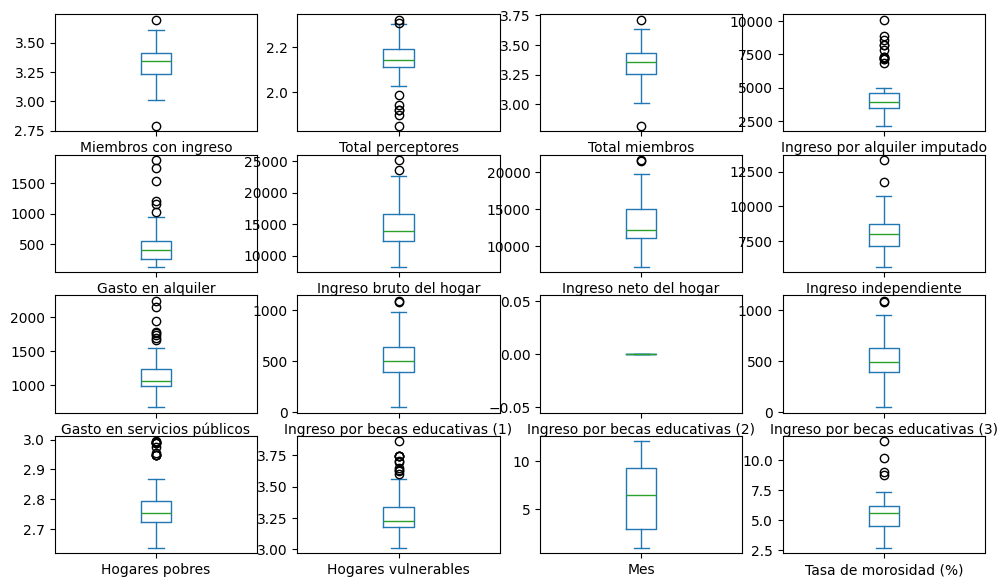

In [ ]:
import matplotlib.pyplot as plt
df_modelo_final.plot(kind='box', subplots=True, layout=(4,4), sharex=True, sharey=False,  figsize=[12,7])
plt.show()

In [ ]:
df_modelo_final = df_modelo_final.drop(columns = ['Ingreso por becas educativas (2)'])

In [ ]:
def corrige_outliers(dfx, columnas_lst):
  for columna in columnas_lst:
    q1 = dfx[columna].quantile(0.25)
    q3 = dfx[columna].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr # upper_limit
    ll = q1 - 1.5*iqr # lower_limit
    dfx.loc[dfx[columna]>ul, columna] = ul
    dfx.loc[dfx[columna]<ll, columna] = ll
  return dfx

In [ ]:
columnas_lst = ['Total miembros', 'Ingreso bruto del hogar', 'Ingreso neto del hogar', 'Ingreso independiente', 'Ingreso por becas educativas (1)',
                'Ingreso por becas educativas (3)']
df_modelo_final = corrige_outliers(df_modelo_final, columnas_lst)

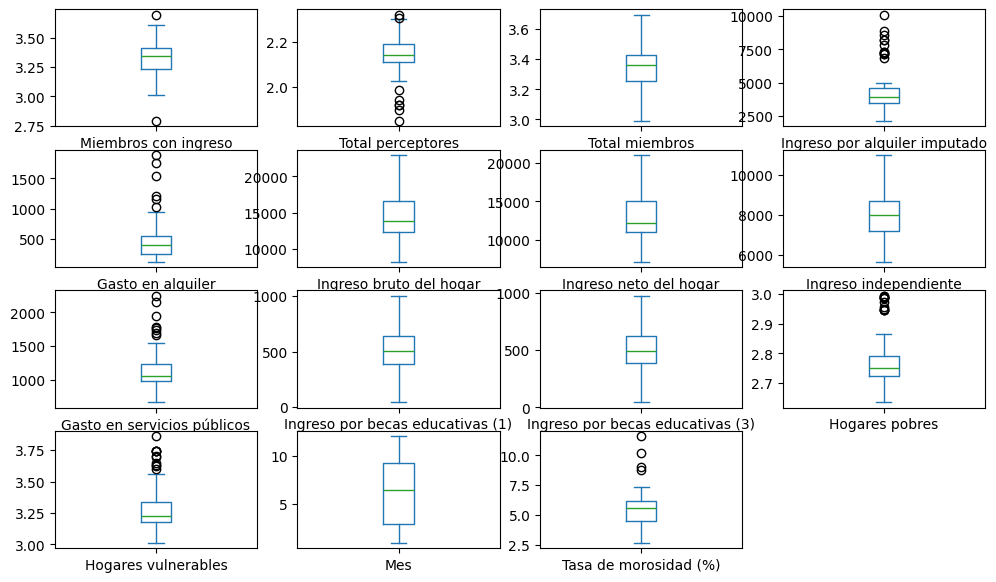

In [ ]:
df_modelo_final.plot(kind='box', subplots=True, layout=(4,4), sharex=True, sharey=False,  figsize=[12,7])
plt.show()

In [ ]:
pd.set_option('display.precision', 2)  # setea la cantidad de decimales a mostrar en lo sucesivo en los dataframes

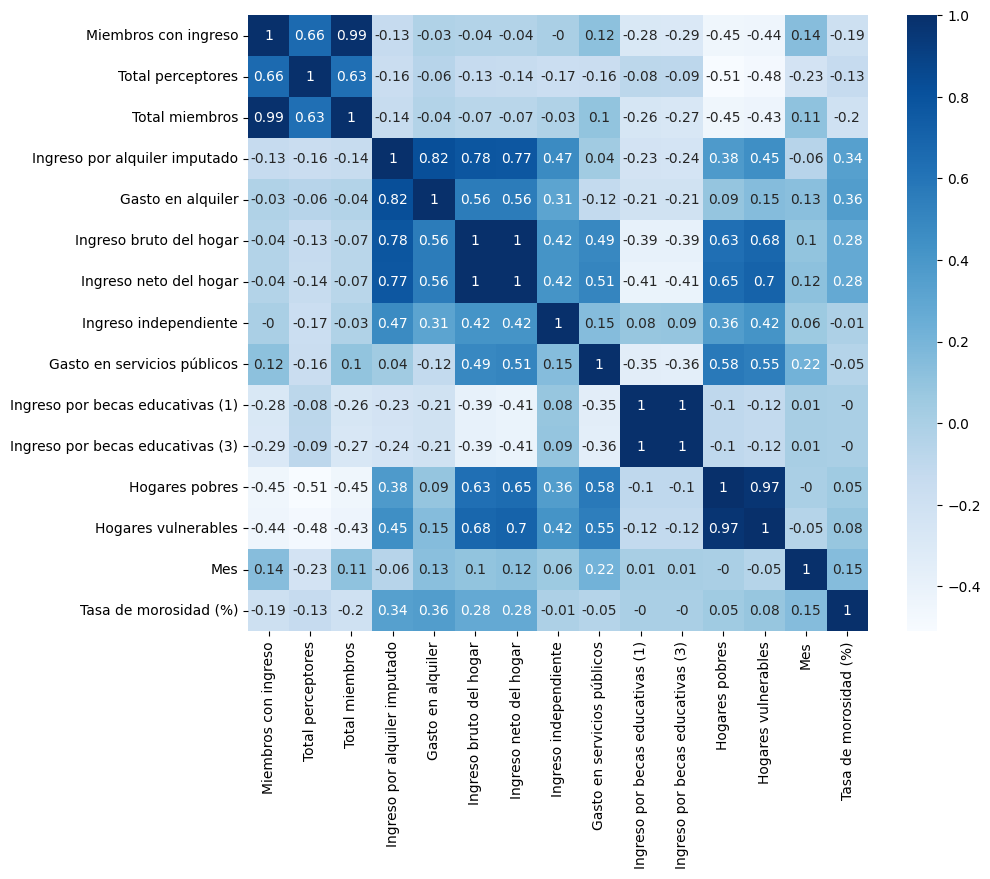

In [ ]:
import seaborn as sns

df_corr = df_modelo_final.corr(numeric_only=True).apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

In [ ]:
df_modelo_final = df_modelo_final.drop(columns = ['Total miembros','Ingreso por alquiler imputado','Ingreso neto del hogar','Hogares vulnerables',
                                                  'Ingreso por becas educativas (3)'])

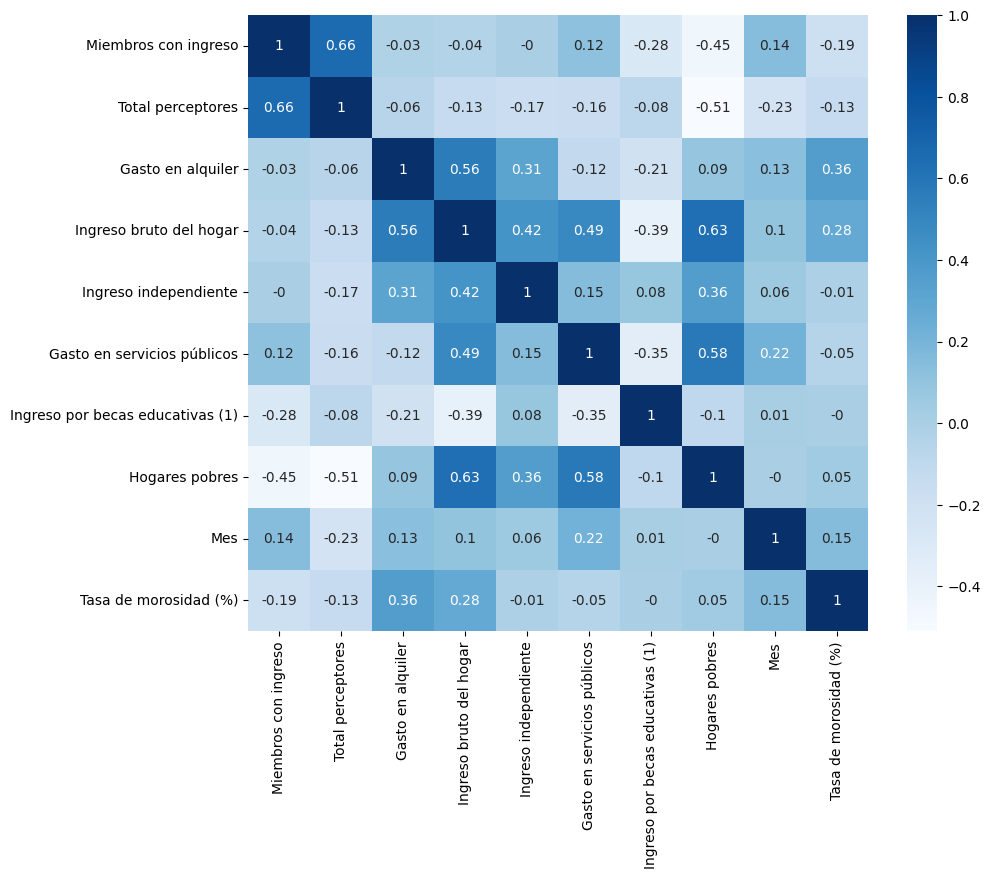

In [ ]:
df_corr = df_modelo_final.corr(numeric_only=True).apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

Pre porcesamiento listo!!!